In [1]:
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("GenericAppName") \
    .getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)

C:\temp\Hadoop\spark-3.3.0-bin-hadoop3\python\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# Task I

In [2]:
# Ingest data 2015-2022
from pyspark import SparkFiles

players_15 = spark.read.csv('FIFA_DATA/players_15.csv',header=True, inferSchema = True)
players_16 = spark.read.csv('FIFA_DATA/players_16.csv',header=True, inferSchema = True)
players_17 = spark.read.csv('FIFA_DATA/players_17.csv',header=True, inferSchema = True)
players_18 = spark.read.csv('FIFA_DATA/players_18.csv',header=True, inferSchema = True)
players_19 = spark.read.csv('FIFA_DATA/players_19.csv',header=True, inferSchema = True)
players_20 = spark.read.csv('FIFA_DATA/players_20.csv',header=True, inferSchema = True)
players_21 = spark.read.csv('FIFA_DATA/players_21.csv',header=True, inferSchema = True)
players_22 = spark.read.csv('FIFA_DATA/players_22.csv',header=True, inferSchema = True)


In [3]:
print(players_15.columns[55])

movement_agility


In [4]:
#Add new column for the year
from pyspark.sql.functions import lit

players_15 = players_15.withColumn('Year', lit(2015))
players_16 = players_16.withColumn('Year', lit(2016))
players_17 = players_17.withColumn('Year', lit(2017))
players_18 = players_18.withColumn('Year', lit(2018))
players_19 = players_19.withColumn('Year', lit(2019))
players_20 = players_20.withColumn('Year', lit(2020))
players_21 = players_21.withColumn('Year', lit(2021))
players_22 = players_22.withColumn('Year', lit(2022))


In [5]:
#Ensure every record can be uniquely identified
#combine fifa id and year as index
from pyspark.sql import functions as sf

players_15 = players_15.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_16 = players_16.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_17 = players_17.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_18 = players_18.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_19 = players_19.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_20 = players_20.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_21 = players_21.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_22 = players_22.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))

In [6]:
# union the data to one dataset
data = players_15.union(players_16)
data = data.union(players_17)
data = data.union(players_18)
data = data.union(players_19)
data = data.union(players_20)
data = data.union(players_21)
data = data.union(players_22)

In [7]:
db_properties={}
#update your db username
db_properties['username']="postgres"
#update your db password
db_properties['password']="psql"
#make sure you got the right port number here
db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
#make sure you had the Postgres JAR file in the right location
db_properties['driver']="org.postgresql.Driver"
db_properties['table']= "fifa.data"



data.write.format("jdbc")\
.mode("overwrite")\
.option("url", db_properties['url'])\
.option("dbtable", db_properties['table'])\
.option("user", db_properties['username'])\
.option("password", db_properties['password'])\
.option("Driver", db_properties['driver'])\
.save()


In [8]:
data.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable

In [9]:
data_read = sqlContext.read.format("jdbc")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .load()

data_read.show(1, vertical=True)

-RECORD 0-------------------------------------------
 sofifa_id                   | 190745               
 player_url                  | https://sofifa.co... 
 short_name                  | M. Silvestri         
 long_name                   | Marco Silvestri      
 player_positions            | GK                   
 overall                     | 69                   
 potential                   | 74                   
 value_eur                   | 1100000.0            
 wage_eur                    | 10000.0              
 age                         | 25                   
 dob                         | 1991-03-02 00:00:00  
 height_cm                   | 191                  
 weight_kg                   | 80                   
 club_team_id                | 8.0                  
 club_name                   | Leeds United         
 league_name                 | English League Ch... 
 league_level                | 2                    
 club_position               | RES            

# Task II

#### Find X

In [84]:
#In order to find the club with highest numbers of players
#use where to find the data in 2022
#use .agg to Compute aggregates when(data_read["club_contract_valid_until"]=='2023' and returns the result as a DataFrame
#group the data by club name and sort them by the count of data
from pyspark.sql import functions as F
def findX(x):
    SORT_club = data_read.where(data_read['Year']=='2022').groupBy("club_name")
    highest_number_club = SORT_club.agg(F.count(F.when(data_read["club_contract_valid_until"]=='2023', "club_name")).alias("count")).sort("count",ascending=False).where(data_read['club_name']!='None')
    highest_number_club.show(x,vertical = True)
findX(5)

-RECORD 0-------------------------
 club_name | En Avant de Guingamp 
 count     | 19                   
-RECORD 1-------------------------
 club_name | Club Atlético Lanús  
 count     | 17                   
-RECORD 2-------------------------
 club_name | Lechia Gdańsk        
 count     | 17                   
-RECORD 3-------------------------
 club_name | Barnsley             
 count     | 16                   
-RECORD 4-------------------------
 club_name | Kasimpaşa SK         
 count     | 16                   
only showing top 5 rows



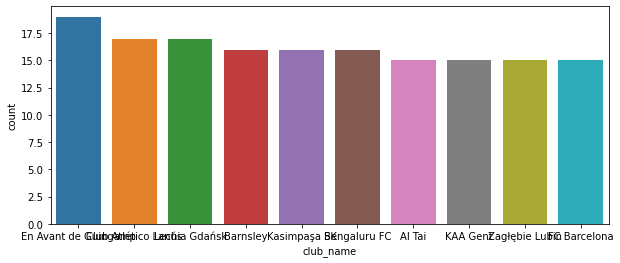

In [90]:
# we drew the barplot of the count to give a direct interpretation
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt

SORT_club = data_read.where(data_read['Year']=='2022').groupBy("club_name")
highest_number_club = SORT_club.agg(F.count(F.when(data_read["club_contract_valid_until"]=='2023', "club_name")).alias("count")).sort("count",ascending=False).where(data_read['club_name']!='None').toPandas()   
plt.figure( figsize = ( 10, 4 ) )
sns.barplot( x="club_name", y="count", data=highest_number_club[:10])
plt.show()

#### FindY

In [12]:
# the number of players older than 27 years oldfor each club
# we used where to find the players who are older than 27 and group the data by club_name, then we sort the data
# to find the club who has the highest number
# we sum the age for each club

import numpy as np
highest_number_over27_count = data_read.where(data_read['age']>27).groupBy("club_name").count().sort("count",ascending=False).toPandas()
highest_number_over27_sum = data_read.where(data_read['age']>27).groupBy("club_name").sum('age').toPandas()
print(highest_number_over27_count)
print(highest_number_over27_sum)
average_over27 = highest_number_over27_sum['sum(age)'].values/highest_number_over27_count['count'].values
print(type(average_over27),average_over27)

                   club_name  count
0                       None    874
1     İstanbul Başakşehir FK    133
2     Jeonbuk Hyundai Motors    118
3        FC Lokomotiv Moscow    108
4             Crystal Palace    106
...                      ...    ...
1007     Caracas Fútbol Club      3
1008          SC Freiburg II      2
1009            FC Helsingør      2
1010            FC Dordrecht      1
1011    Borussia Dortmund II      1

[1012 rows x 2 columns]
                       club_name  sum(age)
0                        Palermo      1105
1     CD Everton de Viña del Mar      1014
2                Shonan Bellmare      1676
3                    Yeovil Town       847
4                     Göztepe SK      1553
...                          ...       ...
1007                        Bury      1731
1008            Rotherham United      1945
1009                 Bohemian FC      1269
1010               Middlesbrough      2064
1011                        Como       219

[1012 rows x 2 columns]
<c

In [92]:
# we calculated the average and found the highest average
def findY(y):
    highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False)
    highest_number_over27_avg.show(y,vertical =True)
findY(5)

-RECORD 0-------------------------
 club_name | Yokohama FC          
 avg(age)  | 34.7037037037037     
-RECORD 1-------------------------
 club_name | Wexford Youths       
 avg(age)  | 34.0                 
-RECORD 2-------------------------
 club_name | Zamora Fútbol Club   
 avg(age)  | 33.857142857142854   
-RECORD 3-------------------------
 club_name | Centro Atlético F... 
 avg(age)  | 33.6                 
-RECORD 4-------------------------
 club_name | CF Fuenlabrada       
 avg(age)  | 33.54545454545455    
only showing top 5 rows



In [93]:
top1_highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False).limit(1).where(data_read['club_name']!='None').toPandas()
print("club with highest numbers over 27:",top1_highest_number_over27_avg['club_name'].values)
findY(1)

club with highest numbers over 27: ['Yokohama FC']
-RECORD 0---------------------
 club_name | Yokohama FC      
 avg(age)  | 34.7037037037037 
only showing top 1 row



In [15]:
# most frequent nation_positions for each year
# we also used where to filter the year, and group them by nation_position, count the number of each position and sort
# them to search the highest one.
most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2015:",most_frequent_nation_2015['nation_position'].values)
most_frequent_nation_2016 = data_read.where(data_read['Year']==2016).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2016:",most_frequent_nation_2016['nation_position'].values)
most_frequent_nation_2017 = data_read.where(data_read['Year']==2017).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2017:",most_frequent_nation_2017['nation_position'].values)
most_frequent_nation_2018 = data_read.where(data_read['Year']==2018).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2018:",most_frequent_nation_2018['nation_position'].values)
most_frequent_nation_2019 = data_read.where(data_read['Year']==2019).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2019:",most_frequent_nation_2019['nation_position'].values)
most_frequent_nation_2020 = data_read.where(data_read['Year']==2020).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2020:",most_frequent_nation_2020['nation_position'].values)
most_frequent_nation_2021 = data_read.where(data_read['Year']==2021).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2021:",most_frequent_nation_2021['nation_position'].values)
most_frequent_nation_2022 = data_read.where(data_read['Year']==2022).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2022:",most_frequent_nation_2022['nation_position'].values)

Most frequent nation position 2015: ['SUB']
Most frequent nation position 2016: ['SUB']
Most frequent nation position 2017: ['SUB']
Most frequent nation position 2018: ['SUB']
Most frequent nation position 2019: ['SUB']
Most frequent nation position 2020: ['SUB']
Most frequent nation position 2021: ['SUB']
Most frequent nation position 2022: ['SUB']


In [16]:
# most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(5).toPandas()
# print(most_frequent_nation_2015)

# Task III

## Data Engineering and cleaning

In [17]:
# Since we only use the skillsets of the players, we dropped all the unneccessary columns
drop_list = ['player_position',' nationality_name','work_rate','body_type','real_face','data_ID','short_name','long_name','dob','club_team_id','club_jersey_number',
                            'club_loaned_from','club_joined','club_contract_valid_until',
                            'nationality_id','nation_team_id','nation_position','nation_jersey_number',
                            'release_clause_eur','player_tags','player_traits','player_face_url',
                            'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                            'player_url','mentality_composure','goalkeeping_speed','club_position','league_level','league_name','club_name']

In [18]:
print(len(drop_list))

33


In [19]:
df_read = data_read.drop('player_positions','nationality_name','work_rate','body_type','real_face','data_ID','short_name','long_name','dob','club_team_id','club_jersey_number',
                            'club_loaned_from','club_joined','club_contract_valid_until',
                            'nationality_id','nation_team_id','nation_position','nation_jersey_number',
                            'release_clause_eur','player_tags','player_traits','player_face_url',
                            'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                            'player_url','mentality_composure','goalkeeping_speed','club_position','league_level','league_name','club_name')

In [20]:
print(len(data_read.columns))
print(len(df_read.columns))

112
79


In [21]:
df_read.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- pace: integer (nullable = true)
 |-- shooting: integer (nullable = true)
 |-- passing: integer (nullable = true)
 |-- dribbling: integer (nullable = true)
 |-- defending: integer (nullable = true)
 |-- physic: integer (nullable = true)
 |-- attacking_crossing: integer (nullable = true)
 |-- attacking_finishing: integer (nullable = true)
 |-- attacking_heading_accuracy: integer (nullable = true)
 |-- attacking_short_passing: integer (nullable = true)
 |-- attacking_volleys

In [22]:

# from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# null_counts_plays_df = df_read.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
#                         for c in df_read.columns])

# null_counts_plays_df.show(truncate=False, vertical=True)

#### impute 'pace','shooting','passing','dribbling','defending','physic'

In [23]:
# we checked the missing values of the whole dataset and we found out that the columns with 
# larger amoungt of missing value: 'pace','shooting','passing','dribbling','defending','physic'
# Because there were many missing value in the data, we want to impute the missing value with the median value

In [24]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['pace']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na = df_read.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed = imputer.fit(df_with_filled_na).transform(df_with_filled_na)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced = df_imputed.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed = df_imputed_enhanced.withColumnRenamed("pace_imputed","pace")

In [25]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['shooting']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na2 = df_fully_imputed.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed2 = imputer.fit(df_with_filled_na2).transform(df_with_filled_na2)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced2 = df_imputed2.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed2 = df_imputed_enhanced2.withColumnRenamed("shooting_imputed","shooting")

In [26]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['passing']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na3 = df_fully_imputed2.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed3 = imputer.fit(df_with_filled_na3).transform(df_with_filled_na3)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced3 = df_imputed3.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed3 = df_imputed_enhanced3.withColumnRenamed("passing_imputed","passing")

In [27]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['dribbling']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na4 = df_fully_imputed3.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed4 = imputer.fit(df_with_filled_na4).transform(df_with_filled_na4)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced4 = df_imputed4.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed4 = df_imputed_enhanced4.withColumnRenamed("dribbling_imputed","dribbling")

In [28]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['defending']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na5 = df_fully_imputed4.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed5 = imputer.fit(df_with_filled_na5).transform(df_with_filled_na5)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced5 = df_imputed5.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed5 = df_imputed_enhanced5.withColumnRenamed("defending_imputed","defending")

In [29]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['physic']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na6 = df_fully_imputed5.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed6 = imputer.fit(df_with_filled_na6).transform(df_with_filled_na6)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced6 = df_imputed6.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed6 = df_imputed_enhanced6.withColumnRenamed("physic_imputed","physic")

In [30]:
from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# null_counts_plays_df = df_fully_imputed6.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
#                         for c in df_read.columns])

# null_counts_plays_df.show(truncate=False, vertical=True)

#### drop null

In [31]:
# we chaecked the missing value again and found out the rows with missing value
# Then we drop the rows
# Reason: The number of row was small compared to the entire dataset, so we just drop them 

In [32]:
df_read = df_fully_imputed6.dropna()

In [33]:
null_counts_plays_df = df_read.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read.columns])

null_counts_plays_df.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 overall                     | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance           

## Data preprocessing

#### label to binary

In [34]:
# Because there are only two values in the 'preferred_foot' column, we convert the value to 0 and 1
label_to_binary = udf(lambda name: 0.0 if name == 'Left' else 1.0)
df_read_bi = df_read.withColumn('preferred_foot', label_to_binary(col('preferred_foot')))

In [35]:
# df_read_bi.show(vertical = True)

#### string to int

In [36]:
# We found the format "XX+X" in some columns and we calculated them and converted them to int
def addall(string):
    if len(string)== 4:
        string = int(string[0:2])+int(string[-1])
    elif len(string) ==2:
        string = int(string)
    elif len(string)== 6:
        string = int(string[-2:])
    return string

In [37]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

In [38]:
addallUDF = udf(lambda i:addall(i), IntegerType())

In [39]:
str_to_int_list = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb',
                   'ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

In [40]:
df_read_int = df_read_bi.withColumn('ls', addallUDF(col('ls')))
df_read_int = df_read_int.withColumn('st', addallUDF(col('st')))
df_read_int = df_read_int.withColumn('rs', addallUDF(col('rs')))
df_read_int = df_read_int.withColumn('lw', addallUDF(col('lw')))
df_read_int = df_read_int.withColumn('lf', addallUDF(col('lf')))
df_read_int = df_read_int.withColumn('cf', addallUDF(col('cf')))
df_read_int = df_read_int.withColumn('rf', addallUDF(col('rf')))
df_read_int = df_read_int.withColumn('rw', addallUDF(col('rw')))
df_read_int = df_read_int.withColumn('lam', addallUDF(col('lam')))
df_read_int = df_read_int.withColumn('cam', addallUDF(col('cam')))
df_read_int = df_read_int.withColumn('ram', addallUDF(col('ram')))
df_read_int = df_read_int.withColumn('lm', addallUDF(col('lm')))
df_read_int = df_read_int.withColumn('lcm', addallUDF(col('lcm')))
df_read_int = df_read_int.withColumn('cm', addallUDF(col('cm')))
df_read_int = df_read_int.withColumn('rcm', addallUDF(col('rcm')))
df_read_int = df_read_int.withColumn('rm', addallUDF(col('rm')))
df_read_int = df_read_int.withColumn('lwb', addallUDF(col('lwb')))
df_read_int = df_read_int.withColumn('ldm', addallUDF(col('ldm')))
df_read_int = df_read_int.withColumn('cdm', addallUDF(col('cdm')))
df_read_int = df_read_int.withColumn('rdm', addallUDF(col('rdm')))
df_read_int = df_read_int.withColumn('rwb', addallUDF(col('rwb')))
df_read_int = df_read_int.withColumn('lb', addallUDF(col('lb')))
df_read_int = df_read_int.withColumn('lcb', addallUDF(col('lcb')))
df_read_int = df_read_int.withColumn('cb', addallUDF(col('cb')))
df_read_int = df_read_int.withColumn('rcb', addallUDF(col('rcb')))
df_read_int = df_read_int.withColumn('rb', addallUDF(col('rb')))
df_read_int = df_read_int.withColumn('gk', addallUDF(col('gk')))

#### cast data type

In [41]:
print(df_read_int.columns)

['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'l

In [42]:
# we changed the type of data to DoubleType

In [43]:
from pyspark.sql.types import DoubleType
for i in df_read_int.columns:
    df_read_int = df_read_int.withColumn(i, df_read_int[i].cast(DoubleType()))

In [44]:
df_read_int.printSchema()

root
 |-- sofifa_id: double (nullable = true)
 |-- overall: double (nullable = true)
 |-- potential: double (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: double (nullable = true)
 |-- height_cm: double (nullable = true)
 |-- weight_kg: double (nullable = true)
 |-- preferred_foot: double (nullable = true)
 |-- weak_foot: double (nullable = true)
 |-- skill_moves: double (nullable = true)
 |-- international_reputation: double (nullable = true)
 |-- attacking_crossing: double (nullable = true)
 |-- attacking_finishing: double (nullable = true)
 |-- attacking_heading_accuracy: double (nullable = true)
 |-- attacking_short_passing: double (nullable = true)
 |-- attacking_volleys: double (nullable = true)
 |-- skill_dribbling: double (nullable = true)
 |-- skill_curve: double (nullable = true)
 |-- skill_fk_accuracy: double (nullable = true)
 |-- skill_long_passing: double (nullable = true)
 |-- skill_ball_control: double (nulla

In [45]:
df_read_features = df_read_int.withColumn('overall_new',col('overall')).drop('overall')

In [46]:
df_read_int.show(5,vertical = True)

-RECORD 0--------------------------------
 sofifa_id                   | 190745.0  
 overall                     | 69.0      
 potential                   | 74.0      
 value_eur                   | 1100000.0 
 wage_eur                    | 10000.0   
 age                         | 25.0      
 height_cm                   | 191.0     
 weight_kg                   | 80.0      
 preferred_foot              | 1.0       
 weak_foot                   | 2.0       
 skill_moves                 | 1.0       
 international_reputation    | 1.0       
 attacking_crossing          | 12.0      
 attacking_finishing         | 20.0      
 attacking_heading_accuracy  | 12.0      
 attacking_short_passing     | 22.0      
 attacking_volleys           | 20.0      
 skill_dribbling             | 18.0      
 skill_curve                 | 16.0      
 skill_fk_accuracy           | 11.0      
 skill_long_passing          | 20.0      
 skill_ball_control          | 22.0      
 movement_acceleration       | 58.

In [47]:
feature_cols = df_read_int.columns
del feature_cols[2]

In [48]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

In [49]:
len(df_read_features.columns)

79

In [50]:

null_counts_plays_df_2 = df_read_features.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read_features.columns])

null_counts_plays_df_2.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power           

In [51]:
df_read_features = df_read_features.dropna()

In [52]:
# we checked the data again to ensure there is no missing value in the dataset
null_counts_plays_df_2 = df_read_features.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read_features.columns])

null_counts_plays_df_2.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power           

In [53]:
# we assembled the features in the data to a vector so that it can be recognized by pyspark models

In [54]:
def transData(data):
    return data.rdd.map(lambda r: [r[-1], Vectors.dense(r[:-1])]).\
           toDF(['output','features'])

data= transData(df_read_features)
data.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|  69.0|[190745.0,74.0,11...|
|  69.0|[190780.0,73.0,10...|
|  69.0|[190783.0,69.0,65...|
|  69.0|[190792.0,72.0,10...|
|  69.0|[190883.0,69.0,77...|
|  69.0|[191079.0,73.0,11...|
|  69.0|[191096.0,70.0,95...|
|  69.0|[191135.0,72.0,12...|
|  69.0|[191222.0,71.0,10...|
|  69.0|[191252.0,69.0,10...|
|  69.0|[191443.0,69.0,32...|
|  69.0|[191548.0,69.0,65...|
|  69.0|[191679.0,69.0,72...|
|  69.0|[191834.0,69.0,82...|
|  69.0|[192009.0,76.0,12...|
|  69.0|[192179.0,69.0,87...|
|  69.0|[192297.0,69.0,87...|
|  69.0|[192449.0,72.0,12...|
|  69.0|[192457.0,70.0,10...|
|  69.0|[192473.0,69.0,11...|
+------+--------------------+
only showing top 20 rows



In [55]:
# we normalized the features by using StandardScaler

In [56]:
from pyspark.ml.feature import StandardScaler
Scalerizer=StandardScaler().setInputCol("features").setOutputCol("norm_features")
data_norm = Scalerizer.fit(data).transform(data)

In [57]:
data_norm = data_norm.drop('features')
data_norm = data_norm.withColumn('features',col('norm_features')).drop('norm_features')

In [58]:
# data_norm.select('features').show(vertical = False)

In [59]:
# (trainingData, testData) = data_norm.randomSplit([0.8, 0.2])

# then we splited the data in to training and test dataset

(trainingData, testData) = data_norm.randomSplit([0.8, 0.2])

In [60]:
trainingData.describe().show()

+-------+-----------------+
|summary|           output|
+-------+-----------------+
|  count|           111721|
|   mean|65.68281701739154|
| stddev| 7.07615617760127|
|    min|             40.0|
|    max|             94.0|
+-------+-----------------+



In [61]:
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 111721
Test Dataset Count: 28009


# Pyspark

## Random Forest

In [63]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

rf = RandomForestRegressor(featuresCol = 'features', labelCol = 'output')

# Create ParamGrid for Cross Validation
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50,100,150,200,300,])
             .addGrid(rf.maxDepth, [3,4,5])
             .build())

evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")

rf_cv = CrossValidator(estimator=rf, estimatorParamMaps=rf_paramGrid, 
                    evaluator=evaluator, numFolds=5)

# Train model.  This also runs the indexer.
model_rf = rf_cv.fit(trainingData)

# Make predictions.
predictions_rf = model_rf.transform(testData)
predictions_rf.show(5)

+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  41.0|[6.40057623302199...|53.669842725778224|
|  42.0|[6.12293559300367...| 53.71640172811433|
|  44.0|[6.45133304662317...| 53.65709730806286|
|  44.0|[6.51719225878871...| 53.86573062028856|
|  44.0|[6.53197579673080...| 53.65709730806286|
+------+--------------------+------------------+
only showing top 5 rows



In [65]:
evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_rf)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 1.58698


### Tune the parameters one by one and see the impact of each parameter

In [60]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf3 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=100, maxDepth=5)

# Train model.  This also runs the indexer.
model3 = rf3.fit(trainingData)

# Make predictions.
predictions3 = model3.transform(testData)

predictions3.show(5)

evaluator3 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse3 = evaluator3.evaluate(predictions3)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse3)

+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  41.0|[6.53690364271165...|53.512072880945354|
|  44.0|[6.41599749220878...|53.512072880945354|
|  44.0|[6.58719665904405...|53.512072880945354|
|  44.0|[6.60650222035666...| 53.76495696951452|
|  45.0|[6.17380835592218...| 53.60100459946284|
+------+--------------------+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.60538


In [61]:
trainingData.show(5)

+------+--------------------+
|output|            features|
+------+--------------------+
|  40.0|[6.30738196932836...|
|  40.0|[6.46263810504961...|
|  41.0|[6.40057623302213...|
|  42.0|[6.12293559300381...|
|  42.0|[6.22430428355967...|
+------+--------------------+
only showing top 5 rows



In [62]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf_1 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=100, maxDepth=6)

# Train model.  This also runs the indexer.
model_1 = rf_1.fit(trainingData)

# Make predictions.
predictions_1 = model_1.transform(testData)

predictions_1.show(5)

evaluator_1 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_1 = evaluator_1.evaluate(predictions_1)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_1)

+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  41.0|[6.53690364271165...|52.39016251553484|
|  44.0|[6.41599749220878...|52.39016251553484|
|  44.0|[6.58719665904405...|52.39016251553484|
|  44.0|[6.60650222035666...|52.77358279353466|
|  45.0|[6.17380835592218...|52.47513371165757|
+------+--------------------+-----------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.33804


## Linear Regression

In [66]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from sklearn.metrics import roc_curve
import pyspark.sql.functions as F
import pyspark.sql.types as T
import numpy
from matplotlib import pyplot as plt

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.sql.types import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [67]:
from pyspark.ml.regression import LinearRegression

lrg = LinearRegression(featuresCol = 'features', labelCol = 'output')

# Create ParamGrid for Cross Validation
lrg_paramGrid = ParamGridBuilder() \
    .addGrid(lrg.maxIter, [10, 30,200,10000]) \
    .addGrid(lrg.regParam, [0, 0.1, 2]) \
    .build()

evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")

lrg_cv = CrossValidator(estimator=lrg, estimatorParamMaps=lrg_paramGrid, 
                    evaluator=evaluator, numFolds=5)

model_lrg = lrg_cv.fit(trainingData)

predictions_lrg = model_lrg.transform(testData)
predictions_lrg.show(5)

+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  41.0|[6.40057623302199...|46.439497176678344|
|  42.0|[6.12293559300367...|  49.2242871853893|
|  44.0|[6.45133304662317...| 46.83448039704086|
|  44.0|[6.51719225878871...| 43.92618287833449|
|  44.0|[6.53197579673080...| 41.81840415146371|
+------+--------------------+------------------+
only showing top 5 rows



In [69]:
evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse5 = evaluator.evaluate(predictions_lrg)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse5)

Root Mean Squared Error (RMSE) on test data = 1.82176


### Tune one by one to find the impact for each hyperparameter

In [66]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_1 = LinearRegression(featuresCol = 'features', labelCol = 'output',regParam=2.0)
# maxIter: int = 100
model_1 = lrg_1.fit(trainingData)
predictions_1 = model_1.transform(testData)

predictions_1.show(5)

evaluator_1 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_1 = evaluator_1.evaluate(predictions_1)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_1)

+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  41.0|[6.53690364271165...|44.227559545991866|
|  44.0|[6.41599749220878...| 47.81024214005528|
|  44.0|[6.58719665904405...|50.707025368422734|
|  44.0|[6.60650222035666...|48.697781658265555|
|  45.0|[6.17380835592218...|48.883788636232325|
+------+--------------------+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 2.14361


In [67]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_2 = LinearRegression(featuresCol = 'features', labelCol = 'output',maxIter=10)
model_2 = lrg_2.fit(trainingData)
predictions_2 = model_2.transform(testData)

predictions_2.show(5)

evaluator_2 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_2 = evaluator_2.evaluate(predictions_2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_2)

+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  41.0|[6.53690364271165...| 41.53811522459333|
|  44.0|[6.41599749220878...| 45.92256921728185|
|  44.0|[6.58719665904405...| 48.79175549801562|
|  44.0|[6.60650222035666...|44.533694117718795|
|  45.0|[6.17380835592218...| 45.96323644678648|
+------+--------------------+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.86664


In [68]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_3 = LinearRegression(featuresCol = 'features', labelCol = 'output',maxIter=30)
model_3 = lrg_3.fit(trainingData)
predictions_3 = model_3.transform(testData)

predictions_3.show(5)

evaluator_3 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_3 = evaluator_3.evaluate(predictions_3)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_3)

+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  41.0|[6.53690364271165...| 40.53397568304155|
|  44.0|[6.41599749220878...| 45.15551922724518|
|  44.0|[6.58719665904405...|48.524183250218016|
|  44.0|[6.60650222035666...| 44.02133666015817|
|  45.0|[6.17380835592218...| 45.43579327618232|
+------+--------------------+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.83285


In [69]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_4 = LinearRegression(featuresCol = 'features', labelCol = 'output',maxIter=200)
model_4 = lrg_4.fit(trainingData)
predictions_4 = model_4.transform(testData)

predictions_4.show(5)

evaluator_4 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_4 = evaluator_4.evaluate(predictions_4)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_4)

+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  41.0|[6.53690364271165...|40.73535289532248|
|  44.0|[6.41599749220878...|45.15357021804499|
|  44.0|[6.58719665904405...|48.66151100088803|
|  44.0|[6.60650222035666...|  44.129994473203|
|  45.0|[6.17380835592218...|45.64501921754493|
+------+--------------------+-----------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.82613


# Tensorflow

In [70]:
from pyspark.sql.types import FloatType

In [71]:
to_array = udf(lambda v: v.toArray().tolist(), ArrayType(FloatType()))

df_test = testData 
df_validate,df_train = trainingData.randomSplit([0.5,0.5])

df_train_pandas = df_train.withColumn('features', to_array('features')).toPandas()
df_validate_pandas = df_validate.withColumn('features', to_array('features')).toPandas()
df_test_pandas = df_test.withColumn('features', to_array('features')).toPandas()

In [72]:
import tensorflow as tf
from tensorflow import keras 

x_train = tf.constant(np.array(df_train_pandas['features'].values.tolist()))
y_train = tf.constant(np.array(df_train_pandas['output'].values.tolist()))

x_validate = tf.constant(np.array(df_validate_pandas['features'].values.tolist()))
y_validate = tf.constant(np.array(df_validate_pandas['output'].values.tolist()))


x_test = tf.constant(np.array(df_test_pandas['features'].values.tolist()))
y_test = tf.constant(np.array(df_test_pandas['output'].values.tolist()))

In [73]:
print(x_train)
print(y_train)

tf.Tensor(
[[6.30738211e+00 7.97132349e+00 2.59242672e-03 ... 3.16481352e+00
  3.29432011e+00 7.40527344e+00]
 [6.22430420e+00 8.29017639e+00 3.45656904e-03 ... 6.43171787e+00
  3.48437715e+00 7.18747139e+00]
 [6.40443134e+00 8.60902977e+00 3.45656904e-03 ... 6.43171787e+00
  3.48437715e+00 7.18747139e+00]
 ...
 [6.02965415e-01 1.49860888e+01 1.50360746e+01 ... 9.29025936e+00
  2.09062624e+00 8.71208668e+00]
 [6.02965415e-01 1.49860888e+01 1.65051174e+01 ... 9.18816853e+00
  2.09062624e+00 8.71208668e+00]
 [4.58066463e+00 1.51455145e+01 1.91839581e+01 ... 9.69862270e+00
  1.52045548e+00 6.75186682e+00]], shape=(56176, 78), dtype=float64)
tf.Tensor([40. 42. 42. ... 94. 94. 94.], shape=(56176,), dtype=float64)


## Neural networks

In [74]:
model_nn = keras.Sequential( [keras.layers.Dense(78,activation='relu'),
                           keras.layers.Dense(10,activation='relu'),
                           keras.layers.Dense(10,activation='relu'),
                           keras.layers.Dense(10,activation='relu') ,
                           keras.layers.Dense(1)] )


In [75]:
y_pred = model_nn(x_train)
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (56176, 78)               6162      
                                                                 
 dense_1 (Dense)             (56176, 10)               790       
                                                                 
 dense_2 (Dense)             (56176, 10)               110       
                                                                 
 dense_3 (Dense)             (56176, 10)               110       
                                                                 
 dense_4 (Dense)             (56176, 1)                11        
                                                                 
Total params: 7,183
Trainable params: 7,183
Non-trainable params: 0
_________________________________________________________________


In [76]:
print(y_pred)
print(y_train)

tf.Tensor(
[[74.732086]
 [74.12477 ]
 [74.16112 ]
 ...
 [73.94921 ]
 [74.17415 ]
 [74.34247 ]], shape=(56176, 1), dtype=float32)
tf.Tensor([40. 42. 42. ... 94. 94. 94.], shape=(56176,), dtype=float64)


In [77]:
mse = keras.losses.MeanSquaredError()

model_nn.compile(optimizer = 'adam',
    loss=mse,
    metrics=[mse])
model_nn.fit(x_train,y_train, epochs = 20,validation_data=(x_validate,y_validate),verbose = 2)

loss = mse(y_train, y_pred).numpy()
print(loss)

Epoch 1/20
1756/1756 - 6s - loss: 14.1575 - mean_squared_error: 14.1562 - val_loss: 13.5213 - val_mean_squared_error: 13.6656 - 6s/epoch - 3ms/step
Epoch 2/20
1756/1756 - 5s - loss: 7.0432 - mean_squared_error: 7.0433 - val_loss: 6.2357 - val_mean_squared_error: 6.2705 - 5s/epoch - 3ms/step
Epoch 3/20
1756/1756 - 5s - loss: 5.6210 - mean_squared_error: 5.6212 - val_loss: 6.5882 - val_mean_squared_error: 6.6034 - 5s/epoch - 3ms/step
Epoch 4/20
1756/1756 - 5s - loss: 4.9807 - mean_squared_error: 4.9805 - val_loss: 4.2374 - val_mean_squared_error: 4.2553 - 5s/epoch - 3ms/step
Epoch 5/20
1756/1756 - 5s - loss: 4.7245 - mean_squared_error: 4.7238 - val_loss: 4.8499 - val_mean_squared_error: 4.8806 - 5s/epoch - 3ms/step
Epoch 6/20
1756/1756 - 6s - loss: 4.5663 - mean_squared_error: 4.5655 - val_loss: 4.4919 - val_mean_squared_error: 4.5089 - 6s/epoch - 3ms/step
Epoch 7/20
1756/1756 - 5s - loss: 4.3092 - mean_squared_error: 4.3104 - val_loss: 5.9678 - val_mean_squared_error: 5.9769 - 5s/epoch

In [78]:
model_nn.evaluate(x_test,y_test, verbose = 2)

869/869 - 1s - loss: 1.6491 - mean_squared_error: 1.6550 - 985ms/epoch - 1ms/step


[1.6490752696990967, 1.6549885272979736]

In [79]:
def cross_valiation(hyper,k,s_r,x,y,logdir):

    def data_split():
        for i in range(k):
            idx=tf.range(df_train_pandas.shape[0])
            splt_idx = int(s_r*df_train_pandas.shape[0])
            idx = tf.random.shuffle(idx)
            x_train, y_train = tf.gather(x, idx[:splt_idx]), tf.gather(y, idx[:splt_idx])
            x_valid, y_valid = tf.gather(x, idx[splt_idx:]), tf.gather(y, idx[splt_idx:])
            return x_train,y_train,x_valid,y_valid

    model = keras.Sequential()
    for _ in range(hparams[HP_DEPTH]):
        model.add(keras.layers.Dense(hparams[HP_WIDTH],activation='relu'))
        model.add(keras.layers.Dense(1))
        model.compile(optimizer = 'adam',
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.losses.MeanSquaredError(name = 'MSE')])
        x_train,y_train,x_valid,y_valid = data_split()
        history = model.fit(x_train, y_train, epochs=5, verbose = 2,validation_data = (x_valid, y_valid),
                  callbacks=[tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)])
        accuracy = np.mean(history.history["MSE"])
        model.summary()
    return accuracy

In [80]:
from tensorboard.plugins.hparams import api as hp

HP_WIDTH = hp.HParam('NN_width', hp.Discrete([10,20,30]))
HP_DEPTH = hp.HParam('NN_depth', hp.Discrete([3,4,5]))


with tf.summary.create_file_writer('logs14813/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_WIDTH, HP_DEPTH],
    metrics=[hp.Metric('MSE')],
  )


In [81]:
import datetime
for hp_width in HP_WIDTH.domain.values:
    for hp_depth in (HP_DEPTH.domain.values):
        hparams = {
            HP_WIDTH: hp_width,
            HP_DEPTH: hp_depth,
        }
        run_name = f"run-WIDTH{int(hparams[HP_WIDTH])}-DEPTH{hparams[HP_DEPTH]}"
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})

        run_dir = 'logs14813/hparam_tuning/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + run_name
        accuracy = cross_valiation(hparams,10,0.7,x_train, y_train,run_dir)

        with tf.summary.create_file_writer(run_dir).as_default():
          hp.hparams(hparams)  # record the values used in this trial
          tf.summary.scalar("MSE", accuracy, step=1)

--- Starting trial: run-WIDTH10-DEPTH3
{'NN_width': 10, 'NN_depth': 3}
Epoch 1/5
1229/1229 - 3s - loss: 69.7070 - MSE: 69.7002 - val_loss: 17.4015 - val_MSE: 17.4038 - 3s/epoch - 2ms/step
Epoch 2/5
1229/1229 - 2s - loss: 12.9095 - MSE: 12.9097 - val_loss: 11.1434 - val_MSE: 11.1429 - 2s/epoch - 2ms/step
Epoch 3/5
1229/1229 - 2s - loss: 9.6867 - MSE: 9.6868 - val_loss: 9.2053 - val_MSE: 9.2047 - 2s/epoch - 2ms/step
Epoch 4/5
1229/1229 - 2s - loss: 8.1534 - MSE: 8.1532 - val_loss: 7.4019 - val_MSE: 7.4012 - 2s/epoch - 2ms/step
Epoch 5/5
1229/1229 - 2s - loss: 7.0980 - MSE: 7.0975 - val_loss: 6.2104 - val_MSE: 6.2098 - 2s/epoch - 2ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                790       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
    

 dense_11 (Dense)            (None, 10)                790       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 863
Trainable params: 863
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1229/1229 - 4s - loss: 1248.1918 - MSE: 1248.0376 - val_loss: 45.589

Epoch 5/5
1229/1229 - 3s - loss: 13.5231 - MSE: 13.5230 - val_loss: 11.8494 - val_MSE: 11.8506 - 3s/epoch - 2ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                790       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
   

 dense_34 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,723
Trainable params: 1,723
Non-trainable params: 0
_________________________________________________________________
--- Starting trial: run-WIDTH20-DEPTH4
{'NN_width': 20, 'NN_depth': 4}
Epoch 1/5
1229/1229 - 3s - loss: 87.3124 - MSE: 87.3030 - val_loss: 19.4831 - val_MSE: 19.4836 - 3s/epoch - 2ms/step
Epoch 2/5
1229/1229 - 2s - loss: 14.1766 - MSE: 14.1761 - val_loss: 11.4002 - val_MSE: 11.4033 - 2s/epoch - 2ms/step
Epoch 3/5
1229/1229 - 2s - loss: 9.6470 - MSE: 9.6472 - val_loss: 8.1581 - val_MSE: 8.1596 - 2s/epoch - 2ms/step
Epoch 4/5
1229/1229 - 2s - loss: 7.2578 - MSE: 7.2576 - val_loss: 6.0401 - val_MSE: 6.0404 - 2s/epoch - 2ms/step
Epoch 5/5
1229/1229 - 2s - loss: 5.7713 - MSE: 5.7717 - val_loss: 4.7100 - val_MSE: 4.7096 - 2s/epoch - 1ms/step
Model: "sequential_5"
_________________________________________________________________
 L

Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1229/1229 - 3s - loss: 222.9749 - MSE: 222.9533 - val_loss: 35.5399 - val_MSE: 35.5379 - 3s/epoch - 2ms/step
Epoch 2/5
1229/1229 - 2s - loss: 26.8101 - MSE: 26.8090 - val_loss: 17.7155 - val_MSE: 17.7133 - 2s/epoch - 2ms/step
Epoch 3/5
1229/1229 - 2s - loss: 14.9769 - MSE: 14.9766 - val_loss: 11.9409 - val_MSE: 11.9392 - 2s/epoch - 2ms/step
Epoch 4/5
1229/1229 - 2s - loss: 10.9279 - MSE: 10.9278 - val_loss: 8.9933 - val_MSE: 8.9924 - 2s/epoch - 2ms/step
Epoch 5/5
1229/1229 - 3s - loss: 8.5932 - MSE: 8.5933 - val_loss: 7.6981 - val_MSE: 7.6979 - 3s/epoch - 2ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 20)                1580      
                                                                 

Epoch 4/5
1229/1229 - 2s - loss: 4.8197 - MSE: 4.8196 - val_loss: 4.0424 - val_MSE: 4.0435 - 2s/epoch - 1ms/step
Epoch 5/5
1229/1229 - 2s - loss: 4.1383 - MSE: 4.1386 - val_loss: 3.5956 - val_MSE: 3.5964 - 2s/epoch - 2ms/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 30)                2370      
                                                                 
 dense_54 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1229/1229 - 3s - loss: 287.0855 - MSE: 287.0576 - val_loss: 41.3187 - val_MSE: 41.3190 - 3s/epoch - 2ms/step
Epoch 2/5
1229/1229 - 2s - loss: 28.4010 - MSE: 28.3999 - val_loss: 18.0117 - val_MSE: 18.0154 - 2s/epo

                                                                 
 dense_62 (Dense)            (None, 1)                 31        
                                                                 
 dense_63 (Dense)            (None, 30)                60        
                                                                 
 dense_64 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,583
Trainable params: 2,583
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1229/1229 - 3s - loss: 15.1015 - MSE: 15.1002 - val_loss: 4.2403 - val_MSE: 4.2402 - 3s/epoch - 2ms/step
Epoch 2/5
1229/1229 - 2s - loss: 4.2167 - MSE: 4.2165 - val_loss: 3.8036 - val_MSE: 3.8035 - 2s/epoch - 2ms/step
Epoch 3/5
1229/1229 - 2s - loss: 3.9636 - MSE: 3.9636 - val_loss: 3.6645 - val_MSE: 3.6640 - 2s/epoch - 2ms/step
Epoch 4/5
1229/1229 - 2s - loss: 3.7364 - MSE: 3.7366 - val_los

                                                                 
 dense_68 (Dense)            (None, 1)                 31        
                                                                 
 dense_69 (Dense)            (None, 30)                60        
                                                                 
 dense_70 (Dense)            (None, 1)                 31        
                                                                 
 dense_71 (Dense)            (None, 30)                60        
                                                                 
 dense_72 (Dense)            (None, 1)                 31        
                                                                 
 dense_73 (Dense)            (None, 30)                60        
                                                                 
 dense_74 (Dense)            (None, 1)                 31        
                                                                 
Total para

## Linear Regression

Instructions for updating:
Use `tf.global_variables_initializer` instead.
1056.453
1057.1117
977.57007
978.2302
898.6871
899.349
819.8042
820.46765
740.9212
741.58624
662.0383
662.70483
583.1554
583.8235
504.27246
504.9421
425.38953
426.06076
346.5066
347.17938
267.62366
268.29797
188.7407
189.41664
109.858086
110.53527
43.021408
43.00537
32.117527
31.522545
32.228374
32.035816
31.210054
30.619781
31.336395
31.12399
30.76221
30.179024
30.885654
30.656467
30.473074
29.895824
30.635881
30.395695
30.296503
29.7233
30.465446
30.216637
30.162111
29.593527
30.315517
30.059908
30.061953
29.496569
30.223164
29.963722
30.006186
29.442467
30.151493
29.889187


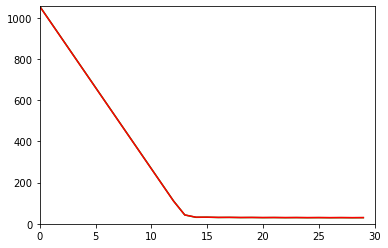

In [82]:
tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.0001
    training_epochs = 30
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418
347.43454
347.80347
441.39053
441.0418


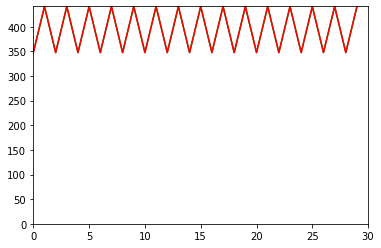

In [86]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.001
    training_epochs = 30
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

1129.305
1129.6372
1121.4169
1121.7489
1113.5287
1113.8607
1105.6406
1105.9725
1097.7524
1098.0844
1089.8644
1090.1962
1081.9762
1082.308
1074.088
1074.4198
1066.1998
1066.5315
1058.3118
1058.6433
1050.4237
1050.7552
1042.5355
1042.8671
1034.6475
1034.9789
1026.7593
1027.0906
1018.871
1019.20233
1010.98303
1011.31415
1003.0948
1003.42596
995.2067
995.5378
987.31854
987.6496
979.4304
979.7614
971.5423
971.8732
963.6542
963.985
955.76605
956.09686
947.87787
948.2087
939.9897
940.3204
932.1017
932.43225
924.21356
924.544
916.3253
916.6558
908.43726
908.76764
900.5491
900.87946
892.66095
892.9912
884.7729
885.1031
876.8847
877.2148
868.9965
869.32666
861.1084
861.4384
853.2203
853.55023
845.33215
845.6622
837.44403
837.77386
829.55597
829.8857
821.6677
821.9975
813.77966
814.1093
805.8914
806.2211
798.0034
798.33295
790.1151
790.44464
782.2271
782.5566
774.3389
774.6683
766.4508
766.7801
758.5627
758.8919
750.6745
751.0037
742.78644
743.11554
734.89825
735.22736
727.01013
727.3392
719.1219

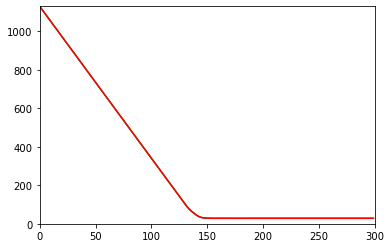

In [87]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.00001
    training_epochs = 300
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

1137.4033
1137.4084
1136.6145
1136.6195
1135.8258
1135.8307
1135.0369
1135.042
1134.248
1134.253
1133.4594
1133.4644
1132.6705
1132.6755
1131.8817
1131.8867
1131.0929
1131.0978
1130.3041
1130.3092
1129.5154
1129.5203
1128.7266
1128.7314
1127.9377
1127.9426
1127.1488
1127.1539
1126.3601
1126.3651
1125.5712
1125.5763
1124.7825
1124.7876
1123.9935
1123.9987
1123.2048
1123.2098
1122.4161
1122.4211
1121.6272
1121.6323
1120.8385
1120.8435
1120.0496
1120.0546
1119.2609
1119.2657
1118.4722
1118.477
1117.6833
1117.6882
1116.8944
1116.8994
1116.1056
1116.1106
1115.3168
1115.3218
1114.5281
1114.5331
1113.7393
1113.7441
1112.9504
1112.9554
1112.1616
1112.1665
1111.3728
1111.3778
1110.5841
1110.589
1109.7953
1109.8
1109.0065
1109.0115
1108.2177
1108.2225
1107.4288
1107.4337
1106.64
1106.645
1105.8513
1105.8561
1105.0625
1105.0674
1104.2736
1104.2786
1103.4849
1103.4897
1102.696
1102.7009
1101.9073
1101.9121
1101.1183
1101.1233
1100.3297
1100.3345
1099.5408
1099.5457
1098.752
1098.7567
1097.9631
109

788.7566
787.964
787.9677
787.1751
787.1789
786.38635
786.3901
785.59753
785.6013
784.8087
784.81256
784.01996
784.02374
783.23114
783.23505
782.4424
782.44604
781.65356
781.6574
780.86475
780.86847
780.076
780.07965
779.2872
779.2909
778.4983
778.5021
777.7096
777.7132
776.9208
776.92456
776.1319
776.13574
775.3432
775.34686
774.5543
774.55804
773.7656
773.7692
772.9768
772.98047
772.1879
772.1916
771.39923
771.4029
770.61035
770.614
769.8215
769.82513
769.0327
769.03656
768.24396
768.2475
767.4551
767.45886
766.66626
766.67004
765.87744
765.88116
765.0887
765.09235
764.29987
764.3037
763.5111
763.5148
762.7223
762.72595
761.9335
761.9372
761.1446
761.1483
760.3559
760.3597
759.5671
759.57086
758.7783
758.7819
757.9895
757.99316
757.2007
757.20435
756.4118
756.4155
755.6231
755.6268
754.8342
754.8379
754.0455
754.049
753.2567
753.2603
752.46796
752.47156
751.6791
751.68274
750.8902
750.894
750.1014
750.10504
749.3127
749.31635
748.5238
748.52747
747.735
747.73865
746.94617
746.9498
74

432.99734
432.20605
432.20856
431.4172
431.41974
430.62842
430.63092
429.83957
429.8421
429.05078
429.05325
428.26196
428.26447
427.47318
427.4756
426.68436
426.68683
425.89554
425.898
425.10672
425.10916
424.3179
424.32037
423.5291
423.5316
422.74026
422.7427
421.95145
421.95392
421.16263
421.16507
420.37384
420.3763
419.585
419.5875
418.79617
418.79865
418.0074
418.00983
417.21857
417.22098
416.42978
416.43213
415.6409
415.6434
414.8521
414.85452
414.0633
414.06573
413.2745
413.27692
412.48566
412.48813
411.69684
411.6993
410.90802
410.91046
410.11923
410.12164
409.3304
409.3328
408.54156
408.54404
407.75278
407.75513
406.96396
406.96637
406.17517
406.17752
405.38632
405.38873
404.5975
404.59995
403.8087
403.81107
403.0199
403.02228
402.23105
402.23343
401.44226
401.44464
400.65344
400.65576
399.86462
399.867
399.07584
399.0782
398.287
398.28934
397.49817
397.50052
396.70935
396.71167
395.92056
395.9229
395.13168
395.1341
394.34293
394.34525
393.55408
393.55643
392.7653
392.76764
391

100.968056
100.19611
100.200645
99.43264
99.438484
98.67322
98.68061
97.9189
97.92828
97.16813
97.18083
96.421646
96.43876
95.67953
95.70252
94.94149
94.9717
94.20876
94.24697
93.480034
93.52546
92.75569
92.808556
92.03506
92.095924
91.31854
91.38684
90.60755
90.68377
89.90215
89.98529
89.20221
89.291885
88.50686
88.60336
87.816765
87.91971
87.13176
87.24081
86.4518
86.566986
85.77669
85.89698
85.10687
85.23311
84.44314
84.57549
83.78607
83.924644
83.13564
83.27974
82.49277
82.64173
81.85713
82.010155
81.22819
81.384674
80.605545
80.76703
79.98976
80.15565
79.379906
79.55014
78.77701
78.95131
78.18198
78.36113
77.59319
77.77769
77.010826
77.199524
76.43567
76.62739
75.86611
76.060776
75.30352
75.500374
74.74626
74.9445
74.19414
74.393364
73.64597
73.84709
73.10191
73.30431
72.56237
72.76671
72.026344
72.23352
71.493385
71.70372
70.96444
71.17768
70.440384
70.655396
69.92038
70.136925
69.40348
69.62064
68.89077
69.108505
68.381485
68.59986
67.87542
68.09403
67.37252
67.59046
66.872406
6

28.823433
28.620226
28.82342
28.620203
28.823404
28.620178
28.823387
28.620155
28.823372
28.620132
28.823357
28.620106
28.82334
28.620079
28.823324
28.620062
28.823307
28.620035
28.823294
28.620014
28.823277
28.619991
28.82326
28.61997
28.823244
28.619946
28.823227
28.61992
28.823212
28.619898
28.82319
28.619879
28.82318
28.619854
28.823164
28.61983
28.823143
28.619808
28.823126
28.61979
28.82311
28.619764
28.823095
28.619743
28.823078
28.619719
28.823057
28.6197
28.823046
28.619675
28.823023
28.619656
28.82301
28.619635
28.82299
28.61961
28.822971
28.619585
28.82295
28.619564
28.822935
28.619545
28.822918
28.61952
28.822891
28.619505
28.822878
28.619476
28.82286
28.619455
28.822838
28.619434
28.822817
28.619417
28.822802
28.619396
28.822784
28.61937
28.822762
28.619352
28.822742
28.619331
28.822723
28.619308
28.822704
28.619287
28.822683
28.619267
28.822668
28.619244
28.822647
28.619223
28.822624
28.6192
28.822607
28.619179
28.822582
28.619158
28.822561
28.619135
28.822542
28.619114
2

28.814667
28.611206
28.814644
28.611185
28.814623
28.611162
28.814602
28.611141
28.81458
28.611122
28.814556
28.611103
28.814537
28.611082
28.814516
28.61106
28.814495
28.611038
28.814474
28.611017
28.814457
28.610994
28.814434
28.610973
28.81441
28.610949
28.814394
28.61093
28.814373
28.610909
28.814346
28.610886
28.814327
28.610865
28.814302
28.610846
28.814281
28.610826
28.81426
28.6108
28.81424
28.610783
28.814215
28.610762
28.814196
28.61074
28.814175
28.610718
28.814154
28.610699
28.814138
28.61068
28.814116
28.610657
28.814095
28.610634
28.814074
28.610611
28.814047
28.610594
28.814032
28.610577
28.814013
28.61055
28.813986
28.61053
28.813967
28.610508
28.813946
28.610489
28.813925
28.61047
28.813904
28.610445
28.81388
28.61042
28.81386
28.610405
28.813839
28.61038
28.813818
28.610355
28.813793
28.610336
28.813774
28.610315
28.813751
28.610292
28.81373
28.610273
28.813707
28.610254
28.81369
28.610235
28.81367
28.610212
28.813646
28.61019
28.81362
28.61017
28.813604
28.61015
28.8

28.805477
28.602047
28.805452
28.602024
28.805431
28.602003
28.805416
28.601988
28.805395
28.601965
28.805372
28.601944
28.805351
28.601925
28.805336
28.6019
28.805311
28.60188
28.805292
28.60186
28.805271
28.601835
28.805248
28.601818
28.805225
28.601795
28.805208
28.60177
28.805182
28.601753
28.805164
28.601732
28.805138
28.601711
28.805117
28.601688
28.805098
28.601667
28.805077
28.601646
28.805058
28.601627
28.80503
28.601604
28.805014
28.601583
28.80499
28.60156
28.80497
28.60154
28.804949
28.60152
28.80493
28.6015
28.804907
28.601477
28.804888
28.601456
28.804867
28.601435
28.804846
28.601416
28.804823
28.601397
28.804802
28.601372
28.804781
28.601353
28.804762
28.601332
28.80474
28.601309
28.804716
28.601288
28.804695
28.601267
28.804674
28.601244
28.804647
28.601225
28.804632
28.601204
28.804607
28.601183
28.804588
28.601164
28.804565
28.601141
28.804546
28.60112
28.804522
28.601099
28.804504
28.601076
28.804482
28.601055
28.80446
28.601032
28.80444
28.601017
28.804419
28.60099

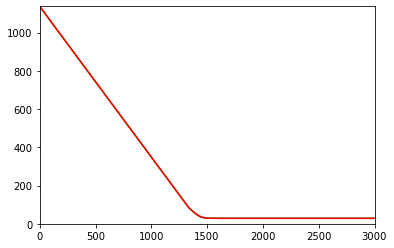

In [88]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.000001
    training_epochs = 3000
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()